<a href="https://colab.research.google.com/github/johnreyes96/mathmeth-mathoptimization-operesearch/blob/master/src/main/python/operationsresearch/minimunspanningtree/MinimumSpanningTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

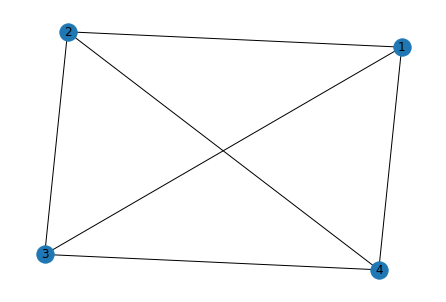

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (4, 3)])
nx.draw(G, with_labels=True)

Árbol de expansión mínima - Algoritmo de PRIM

In [ ]:
def prim(G, s): # s es el nodo inicial para iniciar el algoritmo
  dist = {} # dist registra la distancia mínima al nodo
  parent = {} # padre registra la tabla padre del árbol de expansión mínimo
  Q = list(G.nodes()) # Q contiene todos los nodos cubiertos por el árbol de expansión
  MAXDIST = float('Inf') # MAXDIST significa infinito positivo, es decir, dos nodos no son adyacentes
  # Datos de inicialización
  # La distancia mínima de todos los nodos se establece en MAXDIST y el nodo principal se establece en Ninguno
  for v in G.nodes():
    dist[v] = MAXDIST
    #parent[v] = None
  # La distancia al nodo inicial s se establece en 0
  dist[s] = 0

  # Siga sacando el nodo "más cercano" de Q y agregándolo al árbol de expansión mínimo
  # Detiene el ciclo cuando Q está vacío, el algoritmo termina
  while Q:
    # Saque el nodo "más cercano" u y agregue u al árbol de expansión mínimo
    u = Q[0]
    for v in Q:
      if dist[v] < dist[u]:
        u = v
    Q.remove(u)

    # Actualiza la distancia mínima de los nodos adyacentes de u
    for v in G.adj[u]:
      if (v in Q) and (G[u][v]['weight'] < dist[v]):
        parent[v] = u
        dist[v] = G[u][v]['weight']
  
  # El algoritmo finaliza y devuelve el árbol de expansión mínimo en forma de tabla principal
  return parent

In [ ]:
def draw(g):
  pos = nx.spring_layout(g)
  nx.draw(g, pos, \
          arrows=True, \
          with_labels=True, \
          nodelist=g.nodes(), \
          style='solid', \
          edge_color='k', \
          width=1.5, \
          node_color='y', \
          alpha=0.85)
  plt.show()

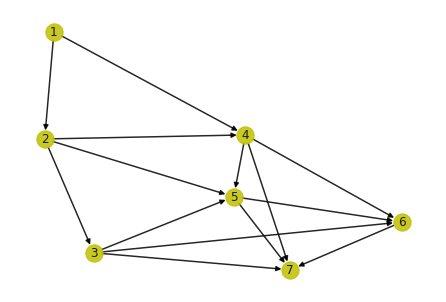

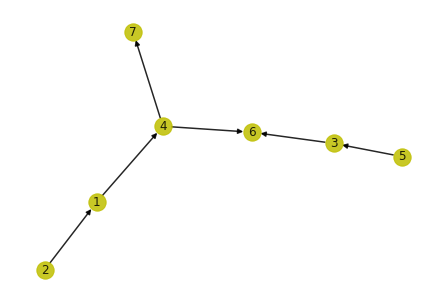

El peso total es 32


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Datos ingresados en formato matriz de arcos y pesos
g_data = [(1,2,7),
          (1,4,5),
          (4,2,9),
          (2,3,8),
          (2,5,7),
          (5,3,5),
          (4,5,15),
          (4,6,6),
          (6,5,8),
          (7,6,11),
          (6,5,9),
          (7,5,9),
          (7,3,8),
          (7,4,5),
          (6,3,4)
          ]


g = nx.Graph()
g.add_weighted_edges_from(g_data)
tree = prim(g,1) # Se empieza el algoritmo con el nodo 1

mtg = nx.Graph()
mtg.add_edges_from(tree.items())
draw(g) # Red original
draw(mtg) # Árbol de mínima expansión
peso=0
for k in tree.keys():
  peso+=g[k][tree[k]]['weight']

print("El peso total es "+ str(peso))

In [ ]:
from networkx.algorithms import tree

mst = tree.minimum_spanning_edges(g, algorithm="prim", data=True)

A = list(mst)
A

[(1, 4, {'weight': 5}),
 (4, 6, {'weight': 6}),
 (1, 2, {'weight': 7}),
 (2, 5, {'weight': 7}),
 (5, 3, {'weight': 5}),
 (5, 7, {'weight': 9})]